/tmp/ipykernel_17802/393978906.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


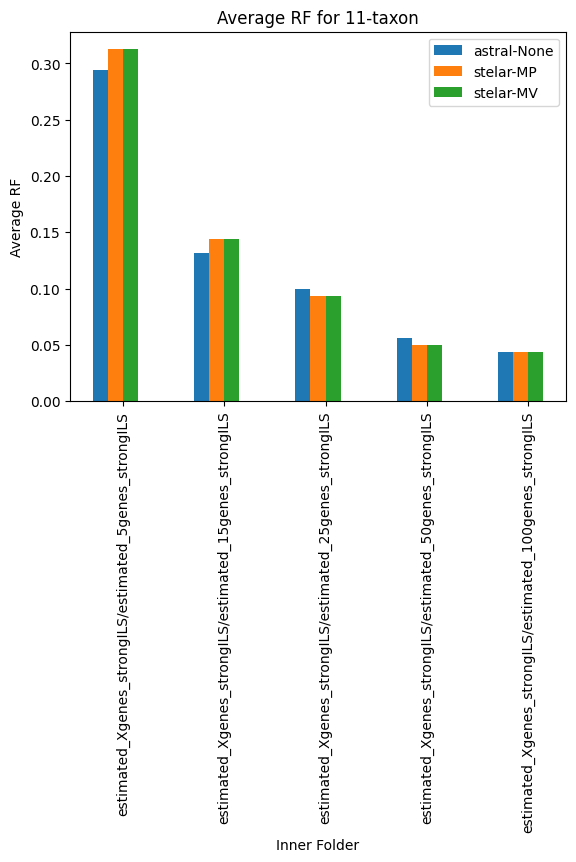

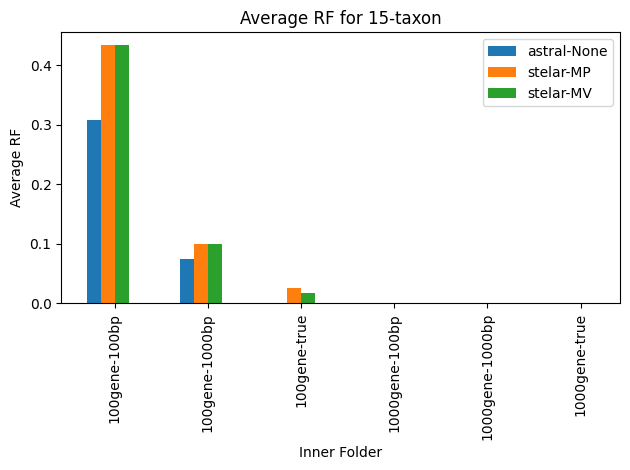

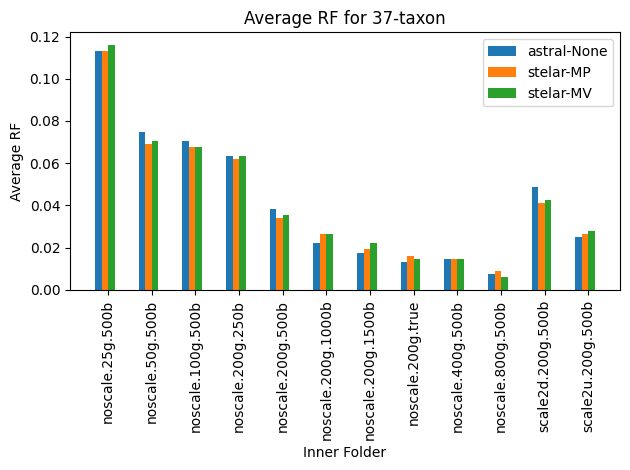

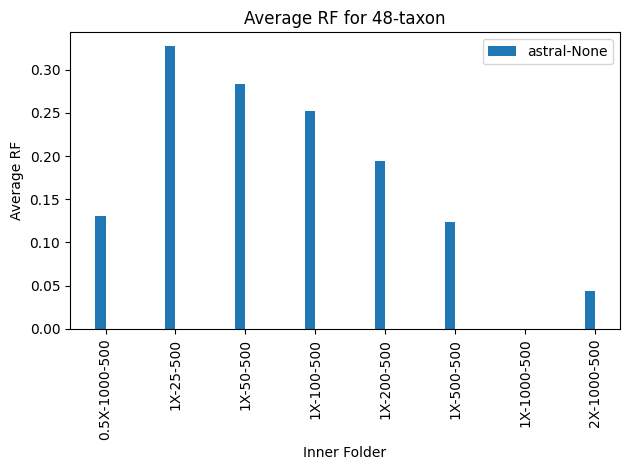

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("../Dataset/final.csv")

# Define valid combinations of summary_method and rooting_method
valid_combinations = [('astral', 'None'), ('stelar', 'MP'), ('stelar', 'MV')]

# Filter the dataset to include only rows with valid combinations
data['rooting_method'] = data['rooting_method'].fillna('None')  # Replace NaN with 'None'
data = data[data.apply(lambda row: (row['summary_method'], row['rooting_method']) in valid_combinations, axis=1)]

# Splitting data by 'folder'
folders = data['folder'].unique()

# Creating a bar chart for each folder
for folder in folders:
    folder_data = data[data['folder'] == folder]

    # Getting unique inner_folders for the x-axis
    inner_folders = folder_data['inner_folder'].unique()

    bar_width = 0.15
    x = np.arange(len(inner_folders))

    fig, ax = plt.subplots()
    offset = 0  # Offset to adjust bar position for valid combinations
    for i, summary_method in enumerate(folder_data['summary_method'].unique()):
        for j, rooting_method in enumerate(folder_data['rooting_method'].unique()):
            if (summary_method, rooting_method) in valid_combinations:
                y = np.zeros(len(inner_folders))
                for k, inner_folder in enumerate(inner_folders):
                    y[k] = folder_data[(folder_data['summary_method'] == summary_method) & 
                                       (folder_data['rooting_method'] == rooting_method) & 
                                       (folder_data['inner_folder'] == inner_folder)]['average_rf'].fillna(0).mean()
                
                # Plotting only valid combinations
                ax.bar(x + offset * bar_width, y, width=bar_width, label=f'{summary_method}-{rooting_method}')
                offset += 1

    # Adjusting the x-axis labels
    ax.set_xticks(x + bar_width * offset / 2)
    ax.set_xticklabels(inner_folders)

    ax.set_xlabel('Inner Folder')
    ax.set_ylabel('Average RF')
    ax.set_title(f'Average RF for {folder}')
    ax.legend()

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
